# **Importing necessary libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import f
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

#Oversampling technique
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, make_scorer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

import xgboost as xgb

import warnings

# Ignore all runtime warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv('fetal_health.csv')
data.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [3]:
data.shape

(2126, 22)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [5]:
data.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [6]:
data.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [7]:
data.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

In [8]:
features=list(data.drop(columns=['fetal_health']).columns)
features

['baseline value',
 'accelerations',
 'fetal_movement',
 'uterine_contractions',
 'light_decelerations',
 'severe_decelerations',
 'prolongued_decelerations',
 'abnormal_short_term_variability',
 'mean_value_of_short_term_variability',
 'percentage_of_time_with_abnormal_long_term_variability',
 'mean_value_of_long_term_variability',
 'histogram_width',
 'histogram_min',
 'histogram_max',
 'histogram_number_of_peaks',
 'histogram_number_of_zeroes',
 'histogram_mode',
 'histogram_mean',
 'histogram_median',
 'histogram_variance',
 'histogram_tendency']

## **Basic EDA**

In [9]:
data['fetal_health'].value_counts()

fetal_health
1.0    1655
2.0     295
3.0     176
Name: count, dtype: int64

In [10]:
X=data[features]
y=data['fetal_health']

In [11]:
X

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,40.0,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,66.0,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,67.0,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,66.0,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0


In [12]:
y

0       2.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
2121    2.0
2122    2.0
2123    2.0
2124    2.0
2125    1.0
Name: fetal_health, Length: 2126, dtype: float64

### **Correlation and Multicollinearity**

**Correlation Plot**

<Axes: >

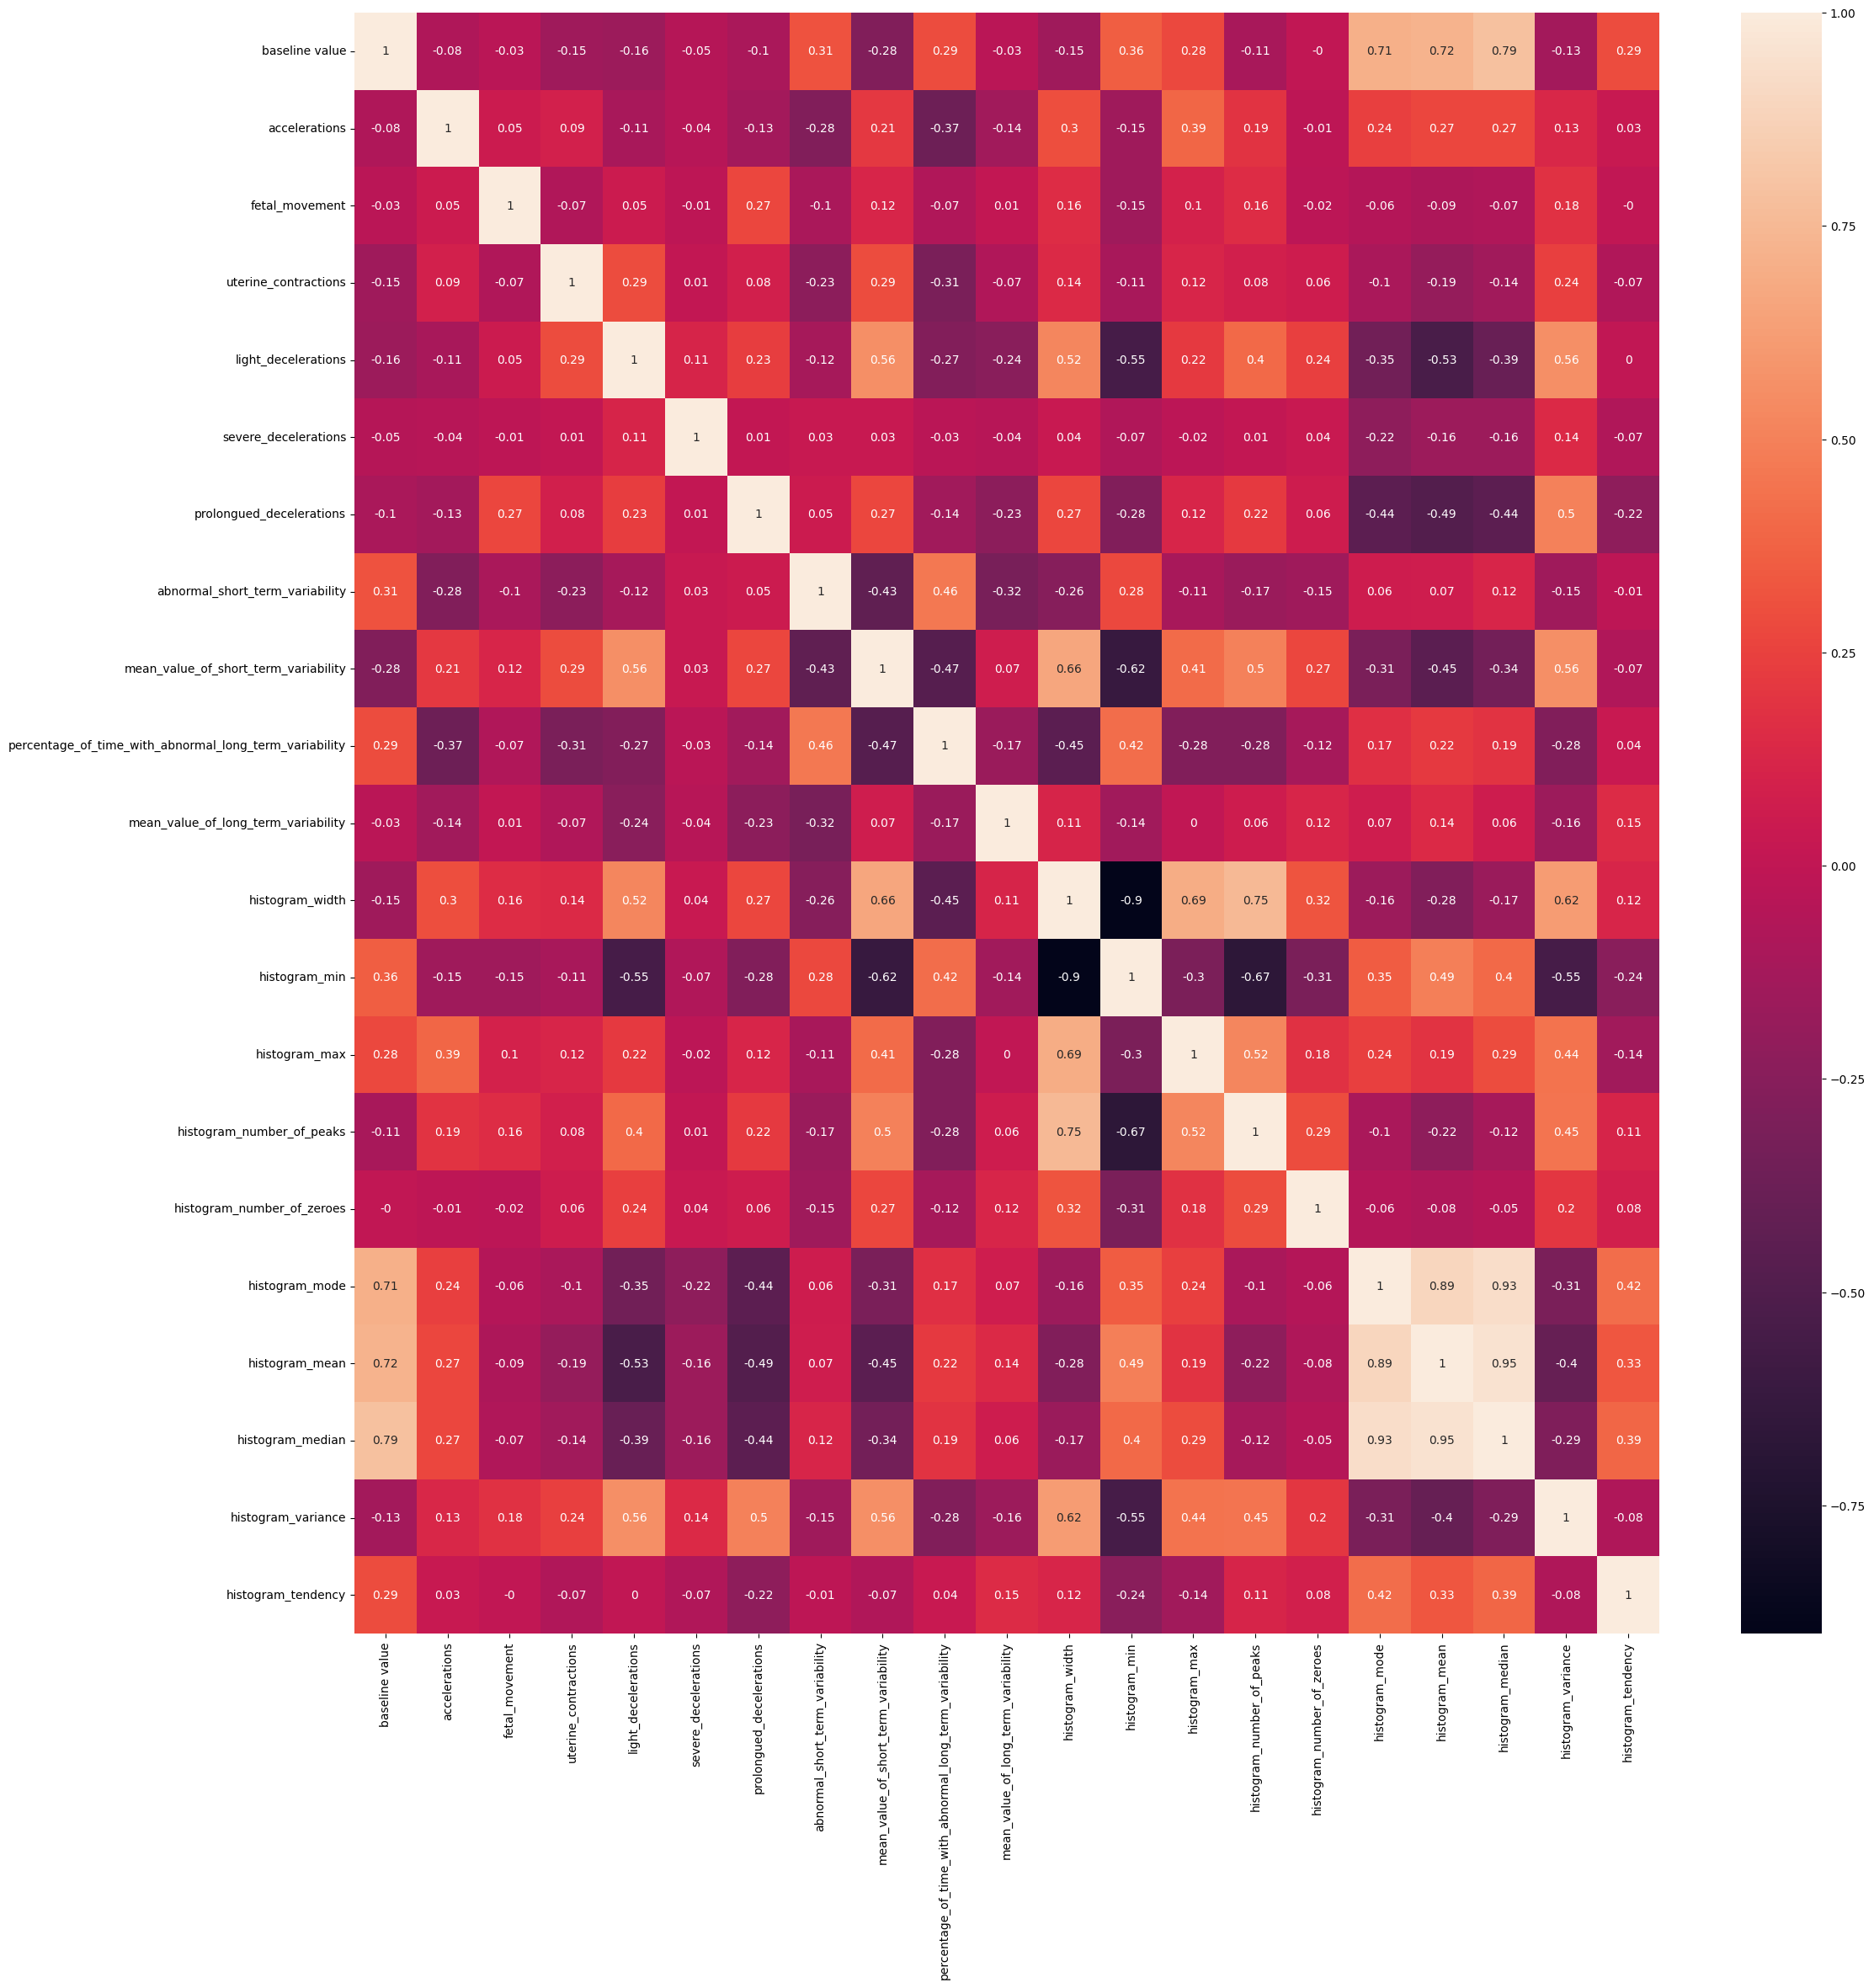

In [13]:
correlation_matrix=X.corr().round(2)
plt.figure(figsize=(25,25))
sns.heatmap(correlation_matrix, annot=True)

 **Multicollinearity test using variance inflation factor(VIF)**

In [14]:
vif_data = pd.DataFrame()
temp=X[features]
vif_data["feature"] = temp.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(temp.values, i)
                          for i in range(len(temp.columns))]

print(vif_data)

                                              feature          VIF
0                                      baseline value  1058.823853
1                                       accelerations     4.801485
2                                      fetal_movement     1.184827
3                                uterine_contractions     4.034365
4                                 light_decelerations     4.799432
5                                severe_decelerations     1.136294
6                            prolongued_decelerations     2.926905
7                     abnormal_short_term_variability    16.051631
8                mean_value_of_short_term_variability     9.457023
9   percentage_of_time_with_abnormal_long_term_var...     2.417343
10                mean_value_of_long_term_variability     6.309741
11                                    histogram_width          inf
12                                      histogram_min          inf
13                                      histogram_max         

VIF values less than 5 typically indicate low multicollinearity, and values below 10 are generally considered acceptable. Looking at your VIF values:

Features with VIF greater than 10:


*   Baseline value


*   Abnormal short term variability

*   Mean value of short term variability
*   Histogram mode


*   Histogram mean


*   Histogram median





## Removing the highly Correlated Columns

In [15]:
features=list(data.drop(columns=['fetal_health', 'baseline value', 'histogram_width', 'histogram_min', 'histogram_max', 'histogram_median','histogram_mode']).columns)
X=data[features]
y=data['fetal_health']

<Axes: >

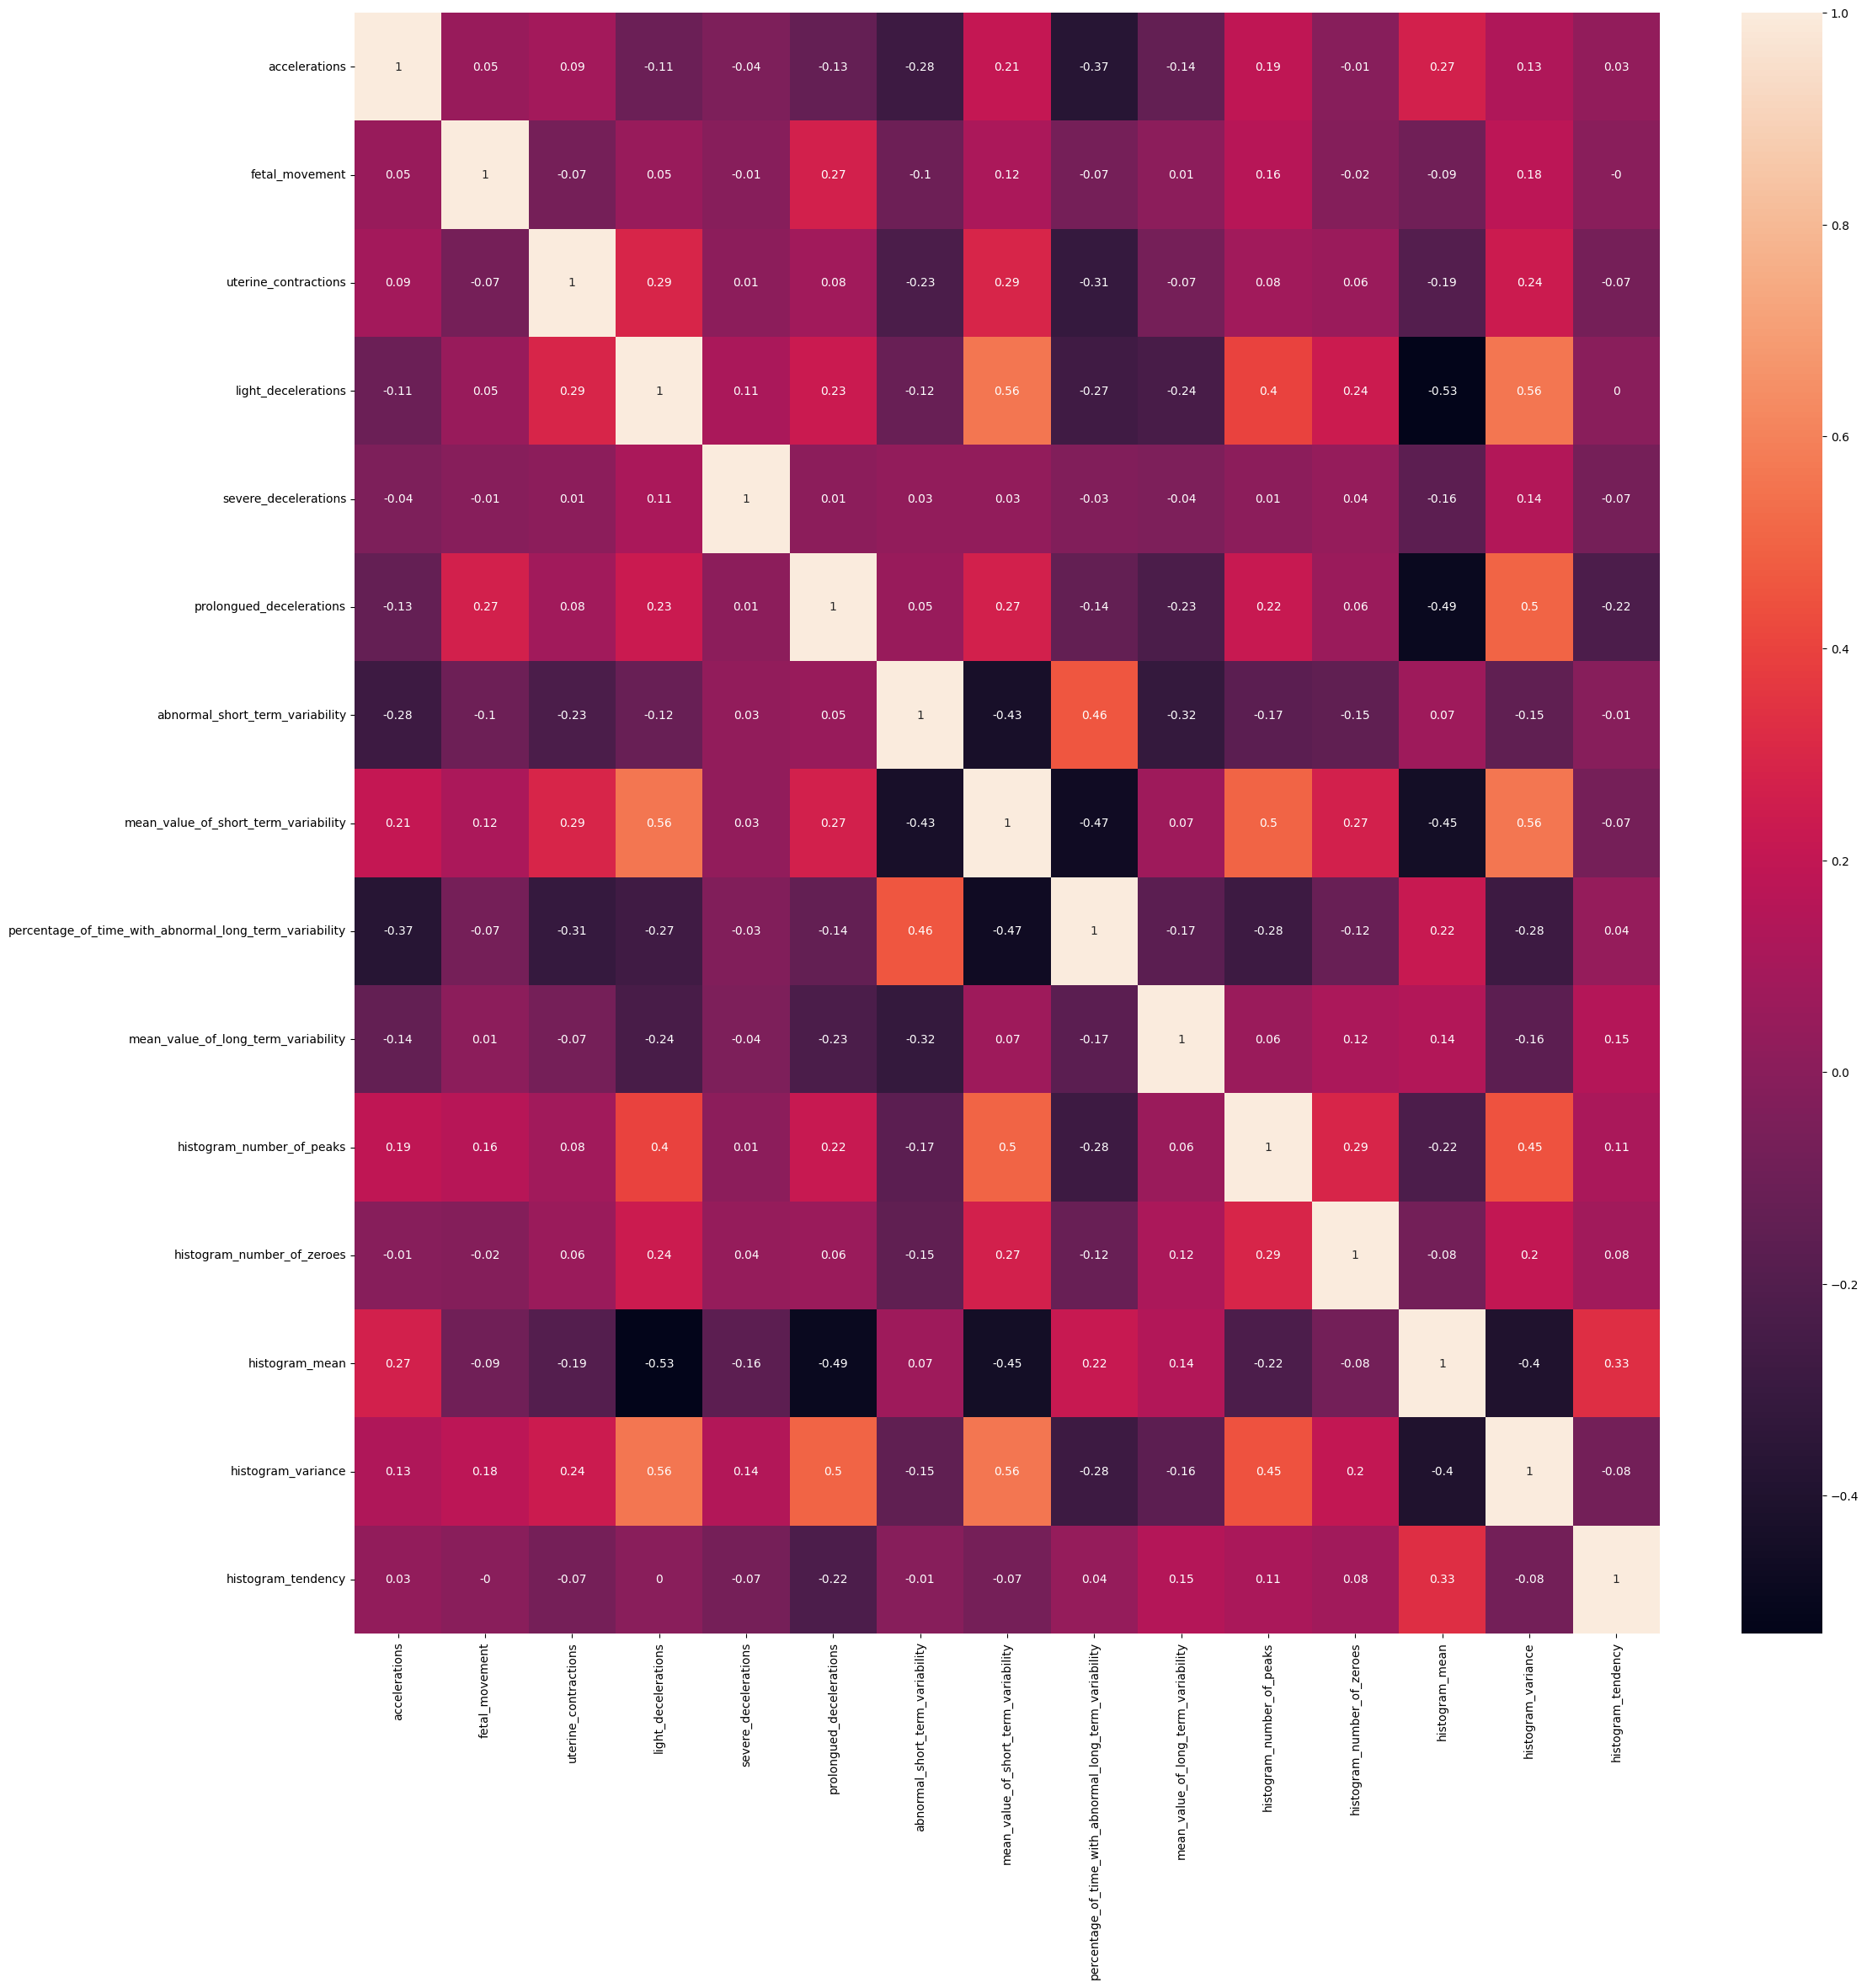

In [16]:
correlation_matrix=X.corr().round(2)
plt.figure(figsize=(25,25))
sns.heatmap(correlation_matrix, annot=True)

In [17]:
vif_data = pd.DataFrame()
temp=X[features]
vif_data["feature"] = temp.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(temp.values, i)
                          for i in range(len(temp.columns))]

print(vif_data)

                                              feature        VIF
0                                       accelerations   3.460885
1                                      fetal_movement   1.181874
2                                uterine_contractions   3.836236
3                                 light_decelerations   3.563483
4                                severe_decelerations   1.050582
5                            prolongued_decelerations   1.911872
6                     abnormal_short_term_variability  12.550871
7                mean_value_of_short_term_variability   7.691667
8   percentage_of_time_with_abnormal_long_term_var...   2.364395
9                 mean_value_of_long_term_variability   5.462454
10                          histogram_number_of_peaks   4.726706
11                         histogram_number_of_zeroes   1.407436
12                                     histogram_mean  30.609040
13                                 histogram_variance   3.268230
14                       

## **Univariate Analysis**

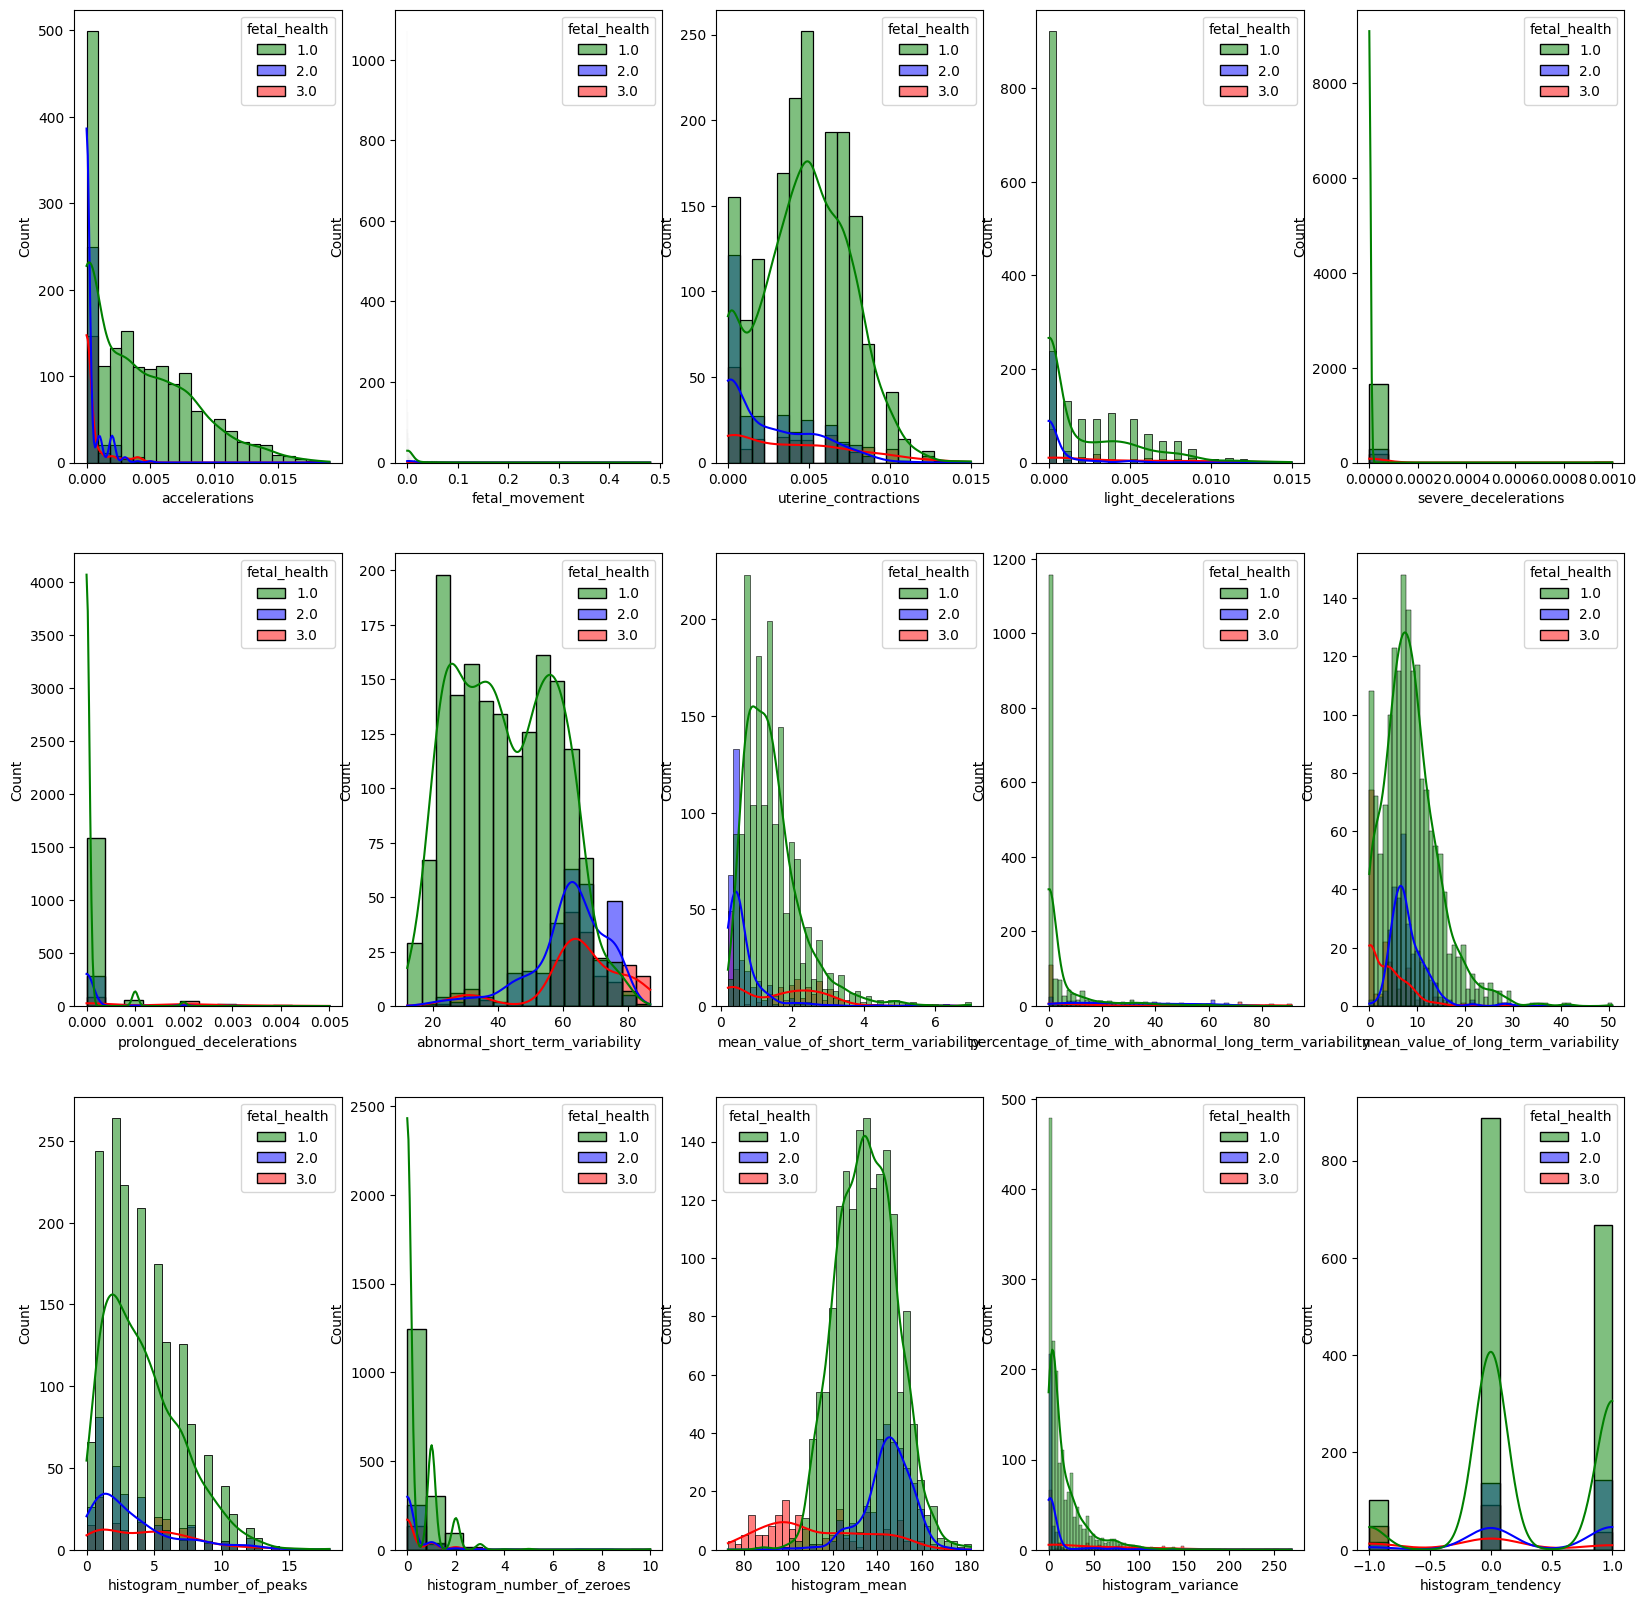

In [18]:
l=len(features)
plt.figure(figsize=(20,20))
for i in range(l):
  plt.subplot(l//4,5,i+1)
  sns.histplot(data=data,x=features[i],kde=True,hue='fetal_health',palette={1:'green',2:'blue',3:'red'})

## **Bivariate Analysis**

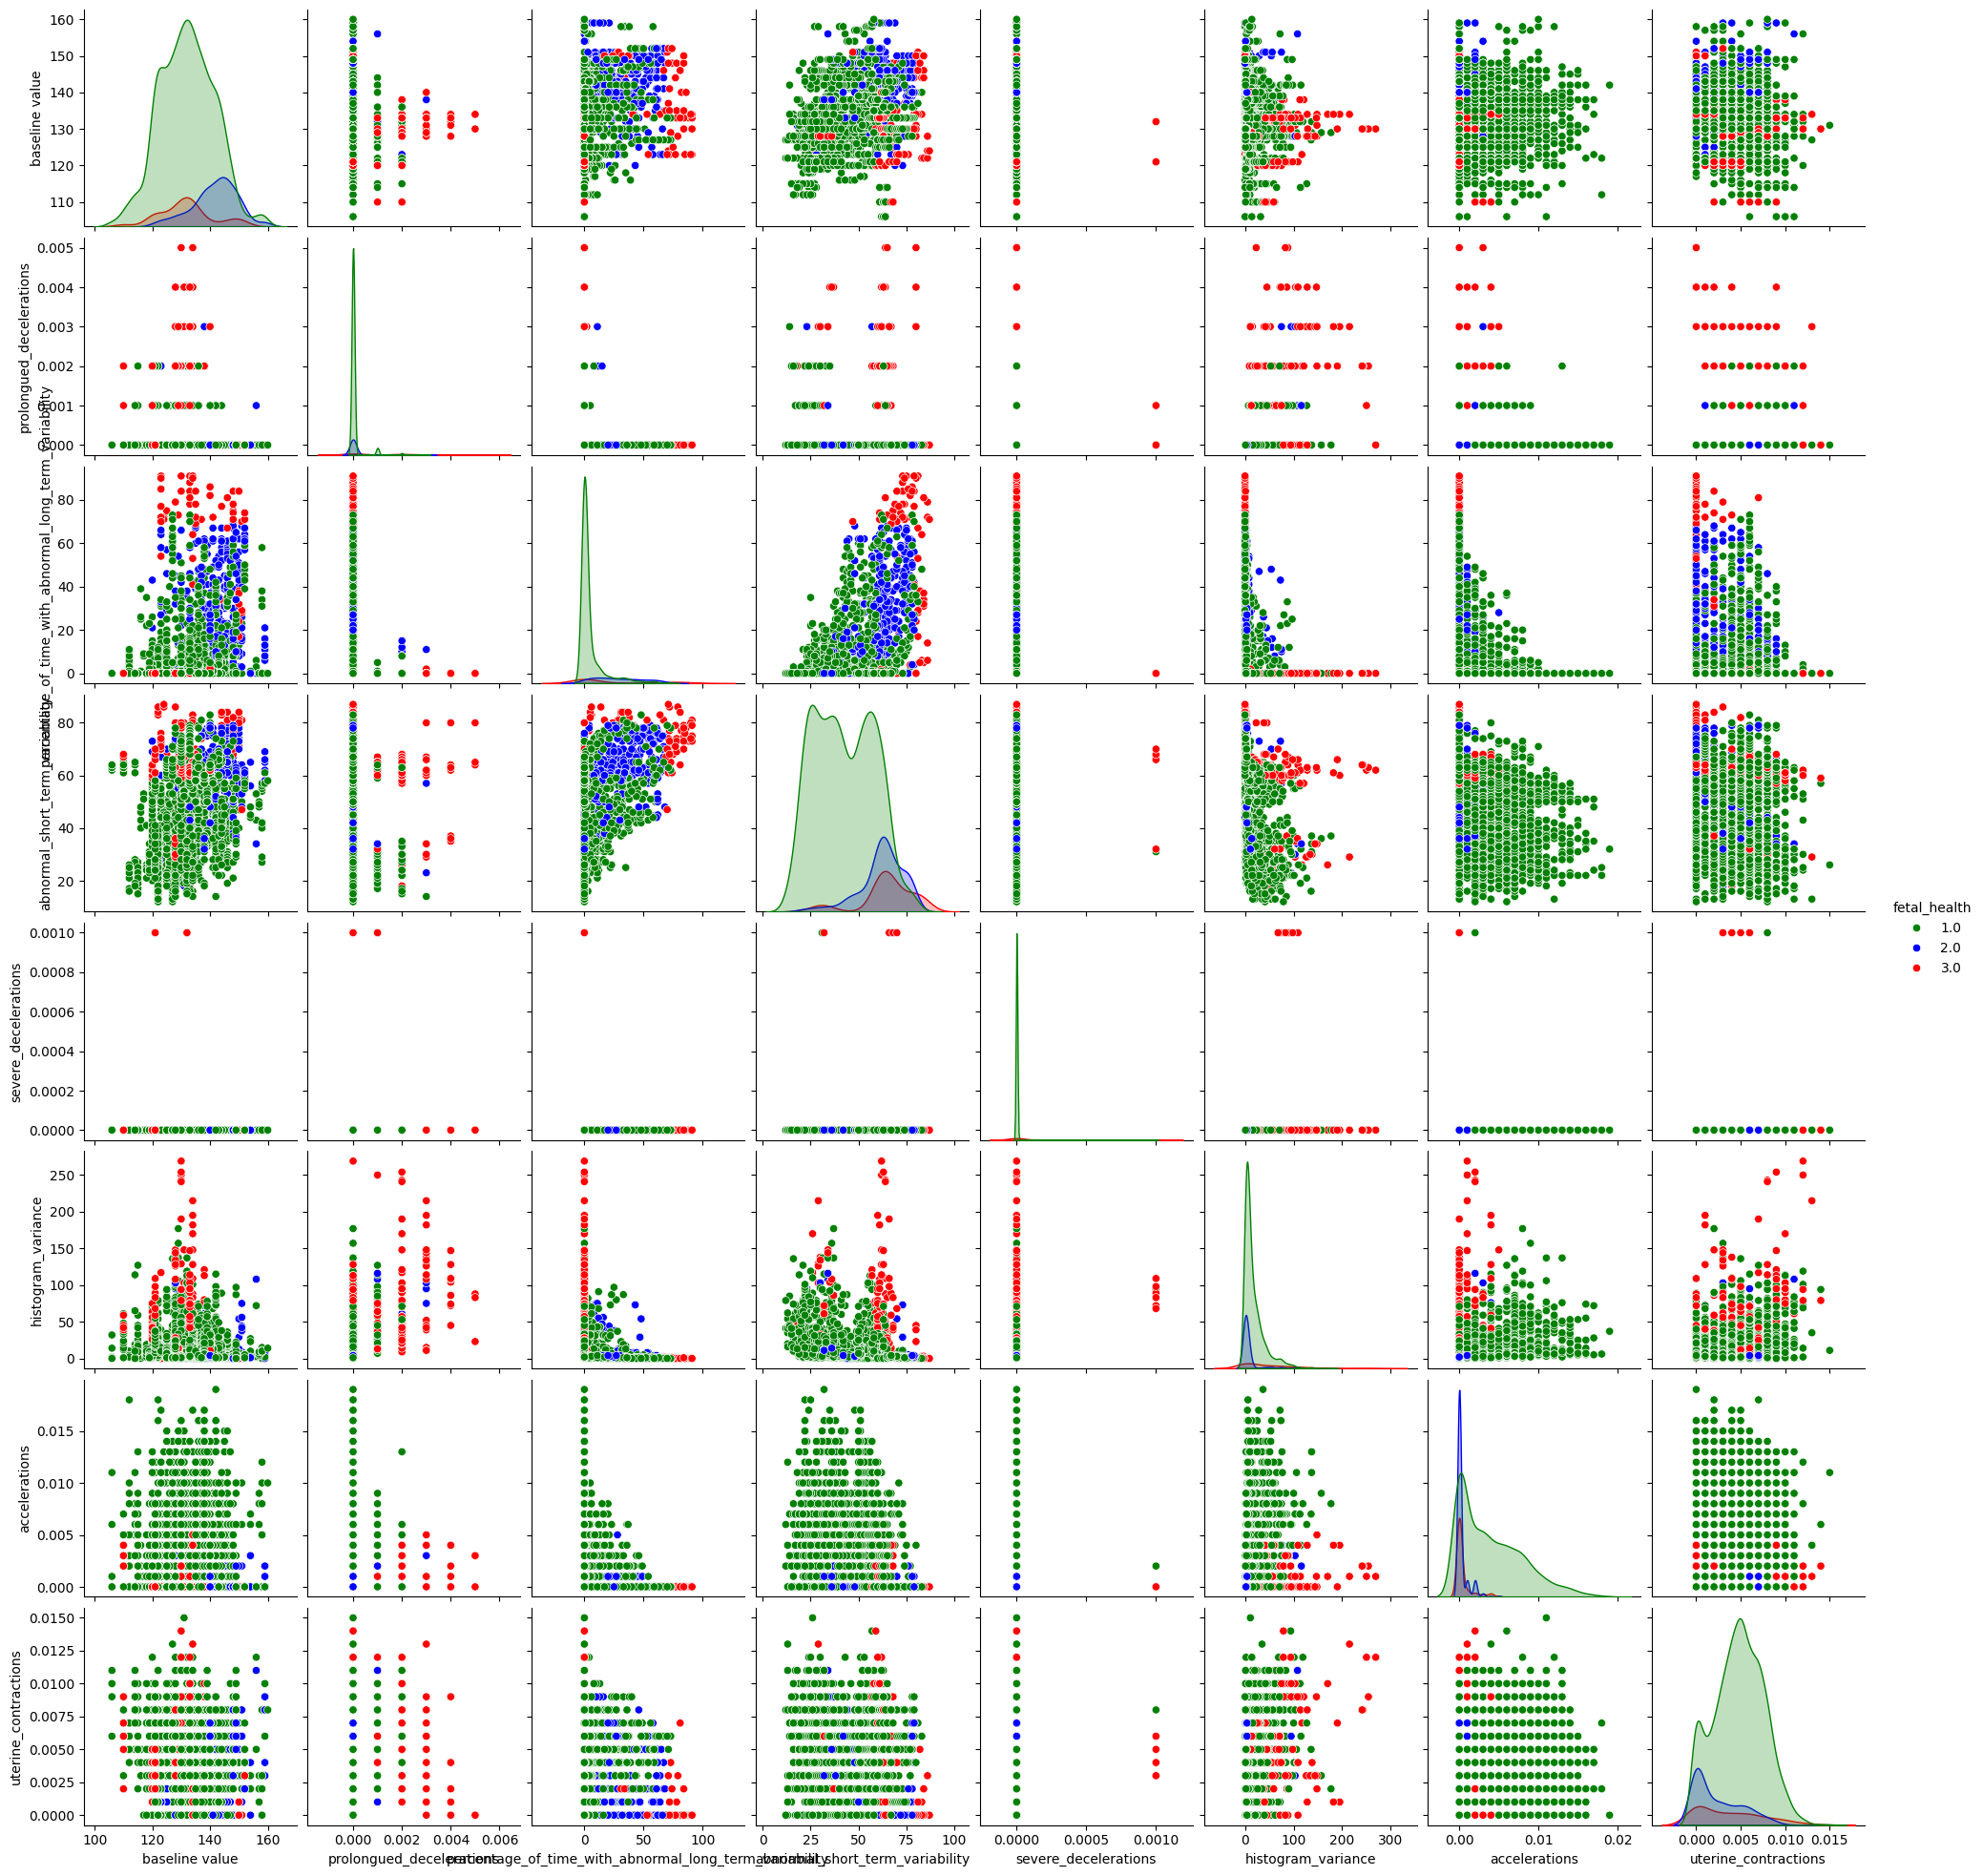

In [19]:
sns.pairplot(data=data[['baseline value','prolongued_decelerations','percentage_of_time_with_abnormal_long_term_variability','abnormal_short_term_variability','severe_decelerations','histogram_variance','accelerations','uterine_contractions','fetal_health']],hue='fetal_health',palette={1:'green',2:'blue',3:'red'})

## **Feature Scaling**

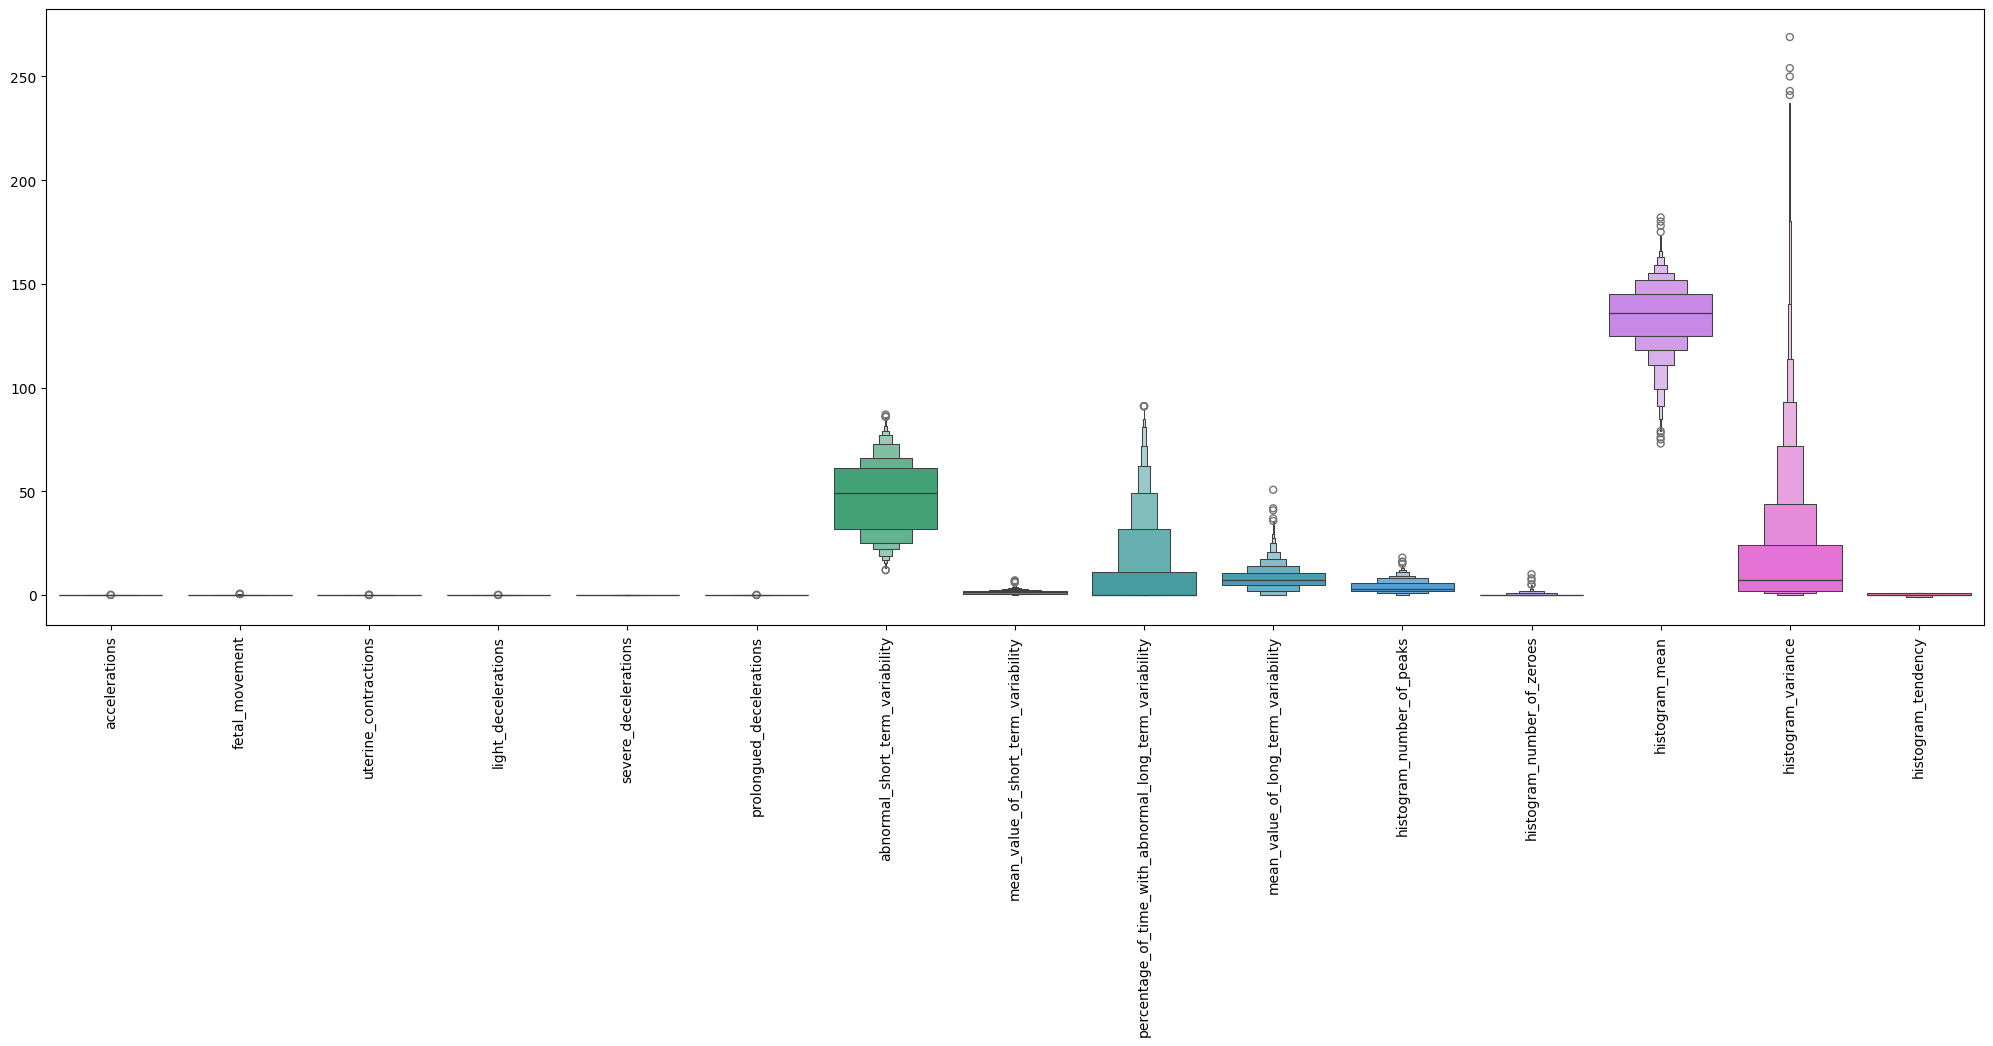

In [20]:
plt.figure(figsize=(25,8))
sns.boxenplot(data=X)
plt.xticks(rotation=90)
plt.show()

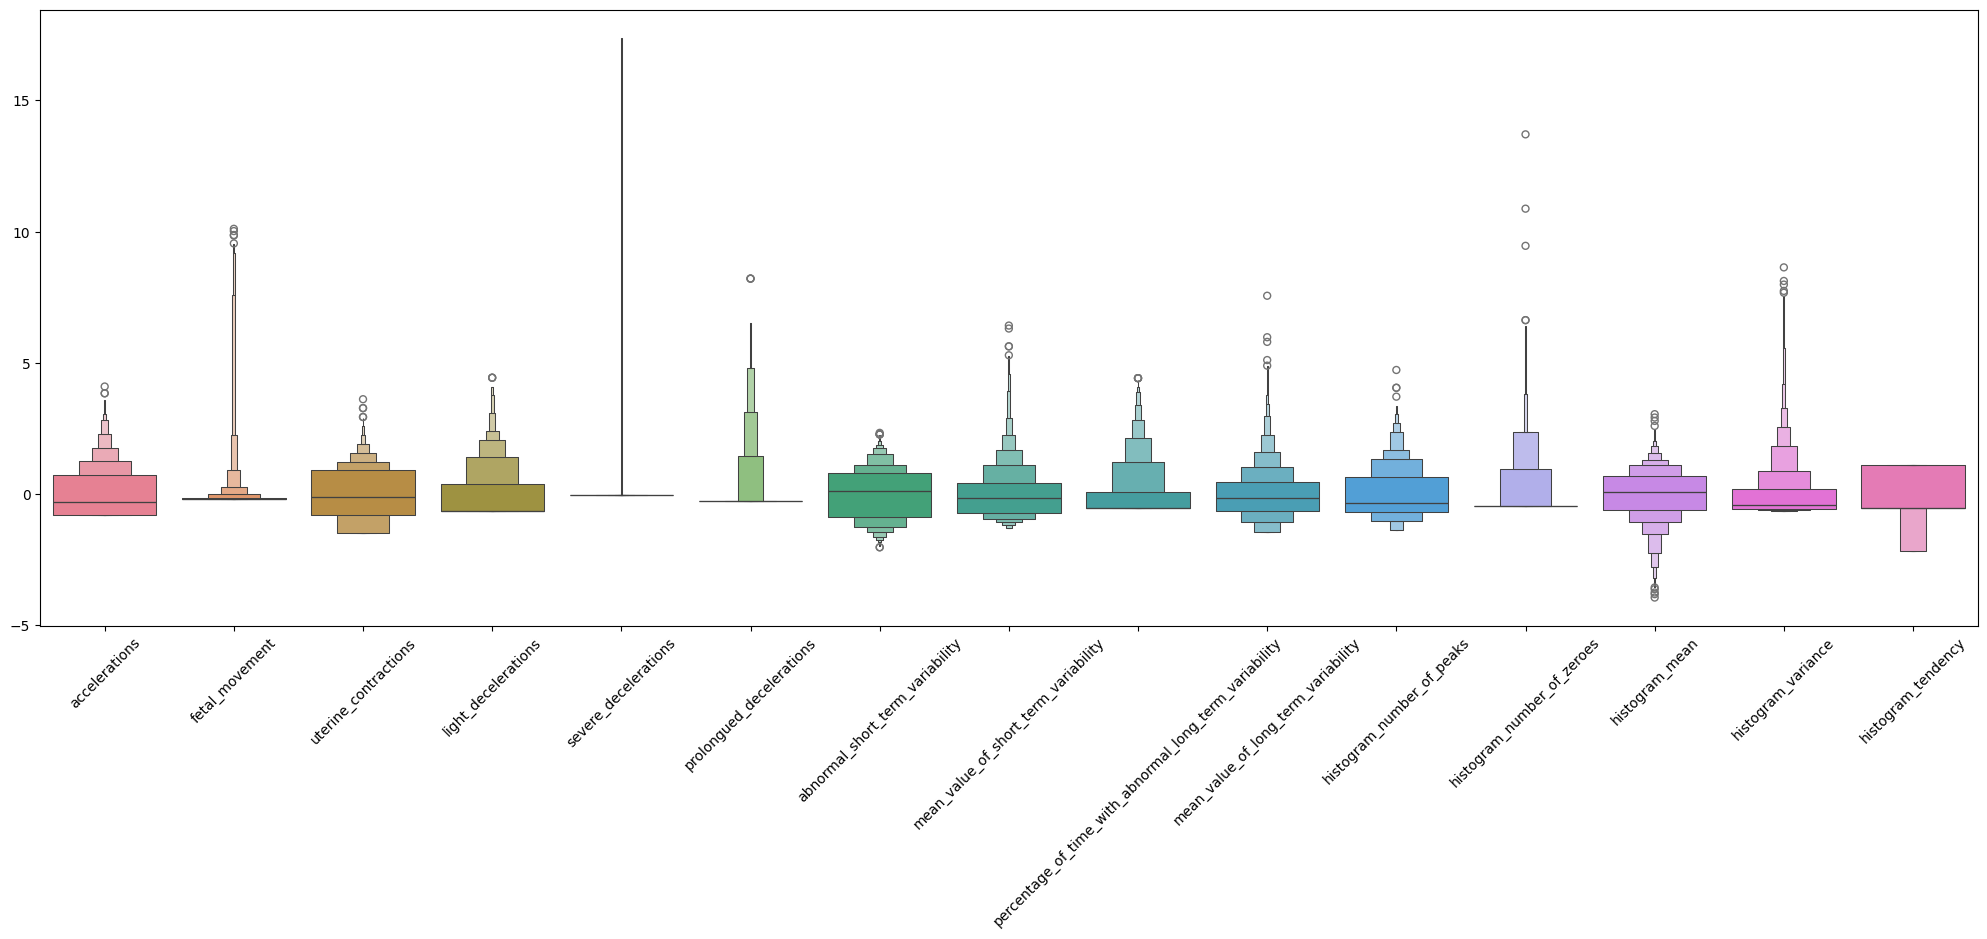

In [21]:
sc=StandardScaler().fit_transform(X)
X_scaled=pd.DataFrame(sc,columns=list(X.columns))

plt.figure(figsize=(25,8))
sns.boxenplot(data=X_scaled)
plt.xticks(rotation=45)
plt.show()

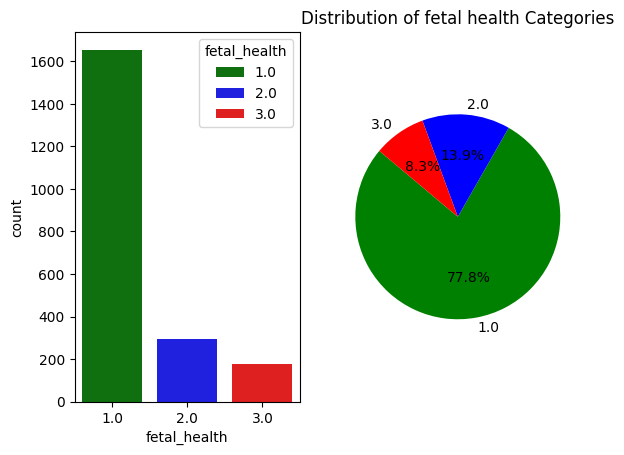

In [22]:
plt.subplot(1,2,1)
sns.countplot(data=data,x='fetal_health',hue='fetal_health',palette={1:'green',2:'blue',3:'red'})

target_counts = data['fetal_health'].value_counts()

# Create pie chart
plt.subplot(1,2,2)
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', startangle=140,colors=[ 'green', 'blue', 'red'] )
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Distribution of fetal health Categories')
plt.show()

## Oversampling - SMOTE

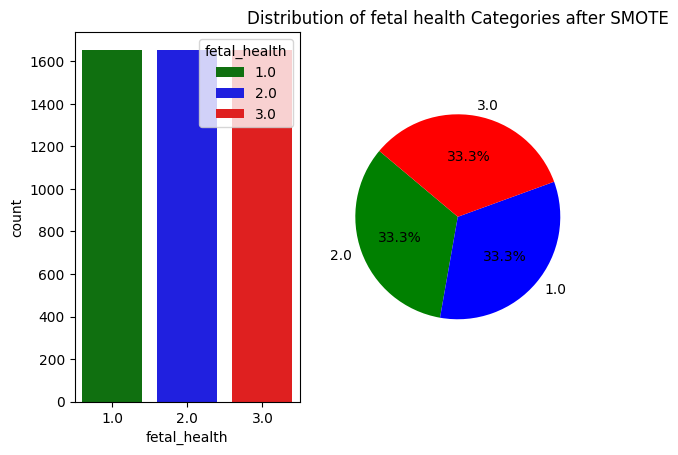

In [23]:
# Initialize SMOTE
smote = SMOTE()

# Apply SMOTE only on training data
X_smote, y_smote = smote.fit_resample(X, y)
target_counts = y_smote.value_counts()

plt.subplot(1,2,1)
sns.countplot(x=y_smote,hue=y_smote,palette={1:'green',2:'blue',3:'red'})
plt.subplot(1,2,2)
# Create pie chart
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', startangle=140,colors=[ 'green', 'blue', 'red'] )
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Distribution of fetal health Categories after SMOTE')
plt.show()

In [24]:
models=[]
model_precision = {1: [], 2: [], 3: []}
model_recall = {1: [], 2: [], 3: []}
model_f1_score = {1: [], 2: [], 3: []}

train_models=[]
train_model_precision = {1: [], 2: [], 3: []}
train_model_recall = {1: [], 2: [], 3: []}
train_model_f1_score = {1: [], 2: [], 3: []}

## Logistic Regression

In [25]:
# Assuming you have your features in X and labels in y as numpy arrays

# Define the number of splits for cross-validation
n_splits = 5
# Initialize Stratified KFold
skf = StratifiedKFold(n_splits=n_splits, shuffle = True, random_state=0)


# Initialize SMOTE
smote = SMOTE()

# Initialize StandardScaler
scaler = StandardScaler()

X_ = X.values
y_np = y.values
y_ = y_np.astype(int)

# Initialize lists to store metrics
accuracies = []
precisions = {1: [], 2: [], 3: []}
recalls = {1: [], 2: [], 3: []}
f1_scores = {1: [], 2: [], 3: []}

train_accuracies = []
train_precisions = {1: [], 2: [], 3: []}
train_recalls = {1: [], 2: [], 3: []}
train_f1_scores = {1: [], 2: [], 3: []}

# Perform cross-validation
for train_index, test_index in skf.split(X_, y_):
    X_train, X_test = X_[train_index], X_[test_index]
    y_train, y_test = y_[train_index], y_[test_index]

    # Apply StandardScaler
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Apply SMOTE only on training data
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

    log_reg = LogisticRegression(max_iter=1000)

# Train your classifier
    log_reg.fit(X_train_resampled, y_train_resampled)

    y_pred = log_reg.predict(X_test_scaled)
    y_pred_train = log_reg.predict(X_train_resampled)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_train = accuracy_score(y_train_resampled, y_pred_train)
    accuracies.append(accuracy)
    train_accuracies.append(accuracy_train)

    # Calculate precision, recall, and F1 score for each class
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, labels=[1, 2, 3])
    for i in range(1, 4):
        precisions[i].append(precision[i-1])
        recalls[i].append(recall[i-1])
        f1_scores[i].append(f1_score[i-1])

    # Calculate precision, recall, and F1 score for each class
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_train_resampled, y_pred_train, labels=[1, 2, 3])
    for i in range(1, 4):
        train_precisions[i].append(precision[i-1])
        train_recalls[i].append(recall[i-1])
        train_f1_scores[i].append(f1_score[i-1])


# Calculate and print the average metrics for each class
avg_accuracy = np.mean(accuracies)
train_avg_accuracy = np.mean(train_accuracies)
print("Average Accuracy:", avg_accuracy)
models.append('Logistic Regression')
train_models.append('Logistic Regression')
for i in range(1, 4):
    avg_precision = np.mean(precisions[i])
    avg_recall = np.mean(recalls[i])
    avg_f1_score = np.mean(f1_scores[i])

    train_avg_precision = np.mean(train_precisions[i])
    train_avg_recall = np.mean(train_recalls[i])
    train_avg_f1_score = np.mean(train_f1_scores[i])

    print(f"\nMetrics for Class {i}:")
    print("Average Precision:", avg_precision)
    print("Average Recall:", avg_recall)
    print("Average F1 Score:", avg_f1_score)
    model_precision[i].append(avg_precision)
    model_recall[i].append(avg_recall)
    model_f1_score[i].append(avg_f1_score)
    train_model_precision[i].append(train_avg_precision)
    train_model_recall[i].append(train_avg_recall)
    train_model_f1_score[i].append(train_avg_f1_score)

Average Accuracy: 0.8626666666666667

Metrics for Class 1:
Average Precision: 0.9823397972670277
Average Recall: 0.8761329305135952
Average F1 Score: 0.9261388020528605

Metrics for Class 2:
Average Precision: 0.5647895454478087
Average Recall: 0.8101694915254237
Average F1 Score: 0.6646861255308765

Metrics for Class 3:
Average Precision: 0.645091218305504
Average Recall: 0.8246031746031746
Average F1 Score: 0.7227544994864774


### SVM Linear Kernel

In [26]:
# Assuming you have your features in X and labels in y as numpy arrays

# Define the number of splits for cross-validation
n_splits = 10
# Initialize Stratified KFold
skf = StratifiedKFold(n_splits=n_splits, shuffle = True, random_state=0)


# Initialize SMOTE
smote = SMOTE()

# Initialize StandardScaler
scaler = StandardScaler()

X_ = X.values
y_np = y.values
y_ = y_np.astype(int)

# Initialize lists to store metrics
accuracies = []
precisions = {1: [], 2: [], 3: []}
recalls = {1: [], 2: [], 3: []}
f1_scores = {1: [], 2: [], 3: []}

train_accuracies = []
train_precisions = {1: [], 2: [], 3: []}
train_recalls = {1: [], 2: [], 3: []}
train_f1_scores = {1: [], 2: [], 3: []}

# Perform cross-validation
for train_index, test_index in skf.split(X_, y_):
    X_train, X_test = X_[train_index], X_[test_index]
    y_train, y_test = y_[train_index], y_[test_index]

    # Apply StandardScaler
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Apply SMOTE only on training data
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

    svm = SVC(kernel="linear")

# Train your classifier
    svm.fit(X_train_resampled, y_train_resampled)

    y_pred = svm.predict(X_test_scaled)
    y_pred_train = svm.predict(X_train_resampled)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_train = accuracy_score(y_train_resampled, y_pred_train)
    accuracies.append(accuracy)
    train_accuracies.append(accuracy_train)

    # Calculate precision, recall, and F1 score for each class
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, labels=[1, 2, 3])
    for i in range(1, 4):
        precisions[i].append(precision[i-1])
        recalls[i].append(recall[i-1])
        f1_scores[i].append(f1_score[i-1])

    # Calculate precision, recall, and F1 score for each class
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_train_resampled, y_pred_train, labels=[1, 2, 3])
    for i in range(1, 4):
        train_precisions[i].append(precision[i-1])
        train_recalls[i].append(recall[i-1])
        train_f1_scores[i].append(f1_score[i-1])


# Calculate and print the average metrics for each class
avg_accuracy = np.mean(accuracies)
train_avg_accuracy = np.mean(train_accuracies)
print("Average Accuracy:", avg_accuracy)
models.append('SVM Linear Kernel')
train_models.append('SVM Linear Kernel')
for i in range(1, 4):
    avg_precision = np.mean(precisions[i])
    avg_recall = np.mean(recalls[i])
    avg_f1_score = np.mean(f1_scores[i])

    train_avg_precision = np.mean(train_precisions[i])
    train_avg_recall = np.mean(train_recalls[i])
    train_avg_f1_score = np.mean(train_f1_scores[i])

    print(f"\nMetrics for Class {i}:")
    print("Average Precision:", avg_precision)
    print("Average Recall:", avg_recall)
    print("Average F1 Score:", avg_f1_score)
    model_precision[i].append(avg_precision)
    model_recall[i].append(avg_recall)
    model_f1_score[i].append(avg_f1_score)
    train_model_precision[i].append(train_avg_precision)
    train_model_recall[i].append(train_avg_recall)
    train_model_f1_score[i].append(train_avg_f1_score)

Average Accuracy: 0.8673664629285145

Metrics for Class 1:
Average Precision: 0.98502317122951
Average Recall: 0.8742971887550199
Average F1 Score: 0.9261500146941801

Metrics for Class 2:
Average Precision: 0.5690580919136351
Average Recall: 0.8439080459770114
Average F1 Score: 0.6769782116443547

Metrics for Class 3:
Average Precision: 0.7007125700237155
Average Recall: 0.8411764705882353
Average F1 Score: 0.7618097428570886


### SVM RBF kernel

In [27]:
# Assuming you have your features in X and labels in y as numpy arrays

# Define the number of splits for cross-validation
n_splits = 10
# Initialize Stratified KFold
skf = StratifiedKFold(n_splits=n_splits, shuffle = True, random_state=0)


# Initialize SMOTE
smote = SMOTE()

# Initialize StandardScaler
scaler = StandardScaler()

X_ = X.values
y_np = y.values
y_ = y_np.astype(int)

# Initialize lists to store metrics
accuracies = []
precisions = {1: [], 2: [], 3: []}
recalls = {1: [], 2: [], 3: []}
f1_scores = {1: [], 2: [], 3: []}

train_accuracies = []
train_precisions = {1: [], 2: [], 3: []}
train_recalls = {1: [], 2: [], 3: []}
train_f1_scores = {1: [], 2: [], 3: []}

# Perform cross-validation
for train_index, test_index in skf.split(X_, y_):
    X_train, X_test = X_[train_index], X_[test_index]
    y_train, y_test = y_[train_index], y_[test_index]

    # Apply StandardScaler
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Apply SMOTE only on training data
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

    svm = SVC(kernel="rbf")

# Train your classifier
    svm.fit(X_train_resampled, y_train_resampled)

    y_pred = svm.predict(X_test_scaled)
    y_pred_train = svm.predict(X_train_resampled)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_train = accuracy_score(y_train_resampled, y_pred_train)
    accuracies.append(accuracy)
    train_accuracies.append(accuracy_train)

    # Calculate precision, recall, and F1 score for each class
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, labels=[1, 2, 3])
    for i in range(1, 4):
        precisions[i].append(precision[i-1])
        recalls[i].append(recall[i-1])
        f1_scores[i].append(f1_score[i-1])

    # Calculate precision, recall, and F1 score for each class
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_train_resampled, y_pred_train, labels=[1, 2, 3])
    for i in range(1, 4):
        train_precisions[i].append(precision[i-1])
        train_recalls[i].append(recall[i-1])
        train_f1_scores[i].append(f1_score[i-1])


# Calculate and print the average metrics for each class
avg_accuracy = np.mean(accuracies)
train_avg_accuracy = np.mean(train_accuracies)
print("Average Accuracy:", avg_accuracy)
models.append('SVM RBF Kernel')
train_models.append('SVM RBF Kernel')
for i in range(1, 4):
    avg_precision = np.mean(precisions[i])
    avg_recall = np.mean(recalls[i])
    avg_f1_score = np.mean(f1_scores[i])

    train_avg_precision = np.mean(train_precisions[i])
    train_avg_recall = np.mean(train_recalls[i])
    train_avg_f1_score = np.mean(train_f1_scores[i])

    print(f"\nMetrics for Class {i}:")
    print("Average Precision:", avg_precision)
    print("Average Recall:", avg_recall)
    print("Average F1 Score:", avg_f1_score)
    model_precision[i].append(avg_precision)
    model_recall[i].append(avg_recall)
    model_f1_score[i].append(avg_f1_score)
    train_model_precision[i].append(train_avg_precision)
    train_model_recall[i].append(train_avg_recall)
    train_model_f1_score[i].append(train_avg_f1_score)

Average Accuracy: 0.8913433430773321

Metrics for Class 1:
Average Precision: 0.9862211653451937
Average Recall: 0.8924388462942678
Average F1 Score: 0.9366097949731135

Metrics for Class 2:
Average Precision: 0.5973900269820525
Average Recall: 0.8747126436781609
Average F1 Score: 0.707777569390173

Metrics for Class 3:
Average Precision: 0.848616652992242
Average Recall: 0.9094771241830065
Average F1 Score: 0.8748598132034665


### KNN

In [28]:
# Assuming you have your features in X and labels in y as numpy arrays

# Define the number of splits for cross-validation
n_splits = 10
# Initialize Stratified KFold
skf = StratifiedKFold(n_splits=n_splits, shuffle = True, random_state=0)


# Initialize SMOTE
smote = SMOTE()

# Initialize StandardScaler
scaler = StandardScaler()

X_ = X.values
y_np = y.values
y_ = y_np.astype(int)

# Initialize lists to store metrics
accuracies = []
precisions = {1: [], 2: [], 3: []}
recalls = {1: [], 2: [], 3: []}
f1_scores = {1: [], 2: [], 3: []}

train_accuracies = []
train_precisions = {1: [], 2: [], 3: []}
train_recalls = {1: [], 2: [], 3: []}
train_f1_scores = {1: [], 2: [], 3: []}

# Perform cross-validation
for train_index, test_index in skf.split(X_, y_):
    X_train, X_test = X_[train_index], X_[test_index]
    y_train, y_test = y_[train_index], y_[test_index]

    # Apply StandardScaler
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Apply SMOTE only on training data
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

    knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors as needed

# Train your classifier
    knn.fit(X_train_resampled, y_train_resampled)

    y_pred = knn.predict(X_test_scaled)
    y_pred_train = knn.predict(X_train_resampled)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_train = accuracy_score(y_train_resampled, y_pred_train)
    accuracies.append(accuracy)
    train_accuracies.append(accuracy_train)

    # Calculate precision, recall, and F1 score for each class
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, labels=[1, 2, 3])
    for i in range(1, 4):
        precisions[i].append(precision[i-1])
        recalls[i].append(recall[i-1])
        f1_scores[i].append(f1_score[i-1])

    # Calculate precision, recall, and F1 score for each class
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_train_resampled, y_pred_train, labels=[1, 2, 3])
    for i in range(1, 4):
        train_precisions[i].append(precision[i-1])
        train_recalls[i].append(recall[i-1])
        train_f1_scores[i].append(f1_score[i-1])


# Calculate and print the average metrics for each class
avg_accuracy = np.mean(accuracies)
train_avg_accuracy = np.mean(train_accuracies)
print("Average Accuracy:", avg_accuracy)
models.append('KNN')
train_models.append('KNN')
for i in range(1, 4):
    avg_precision = np.mean(precisions[i])
    avg_recall = np.mean(recalls[i])
    avg_f1_score = np.mean(f1_scores[i])

    train_avg_precision = np.mean(train_precisions[i])
    train_avg_recall = np.mean(train_recalls[i])
    train_avg_f1_score = np.mean(train_f1_scores[i])

    print(f"\nMetrics for Class {i}:")
    print("Average Precision:", avg_precision)
    print("Average Recall:", avg_recall)
    print("Average F1 Score:", avg_f1_score)
    model_precision[i].append(avg_precision)
    model_recall[i].append(avg_recall)
    model_f1_score[i].append(avg_f1_score)
    train_model_precision[i].append(train_avg_precision)
    train_model_recall[i].append(train_avg_recall)
    train_model_f1_score[i].append(train_avg_f1_score)

Average Accuracy: 0.8880414562848792

Metrics for Class 1:
Average Precision: 0.9771990798842755
Average Recall: 0.8984811975173421
Average F1 Score: 0.9359292390347674

Metrics for Class 2:
Average Precision: 0.5976007633170792
Average Recall: 0.8372413793103448
Average F1 Score: 0.695197931549358

Metrics for Class 3:
Average Precision: 0.831054856343758
Average Recall: 0.8748366013071897
Average F1 Score: 0.8490692919911187


### Decision Tree

In [29]:
# Assuming you have your features in X and labels in y as numpy arrays

# Define the number of splits for cross-validation
n_splits = 10
# Initialize Stratified KFold
skf = StratifiedKFold(n_splits=n_splits, shuffle = True, random_state=0)


# Initialize SMOTE
smote = SMOTE()

# Initialize StandardScaler
scaler = StandardScaler()

X_ = X.values
y_np = y.values
y_ = y_np.astype(int)

# Initialize lists to store metrics
accuracies = []
precisions = {1: [], 2: [], 3: []}
recalls = {1: [], 2: [], 3: []}
f1_scores = {1: [], 2: [], 3: []}

train_accuracies = []
train_precisions = {1: [], 2: [], 3: []}
train_recalls = {1: [], 2: [], 3: []}
train_f1_scores = {1: [], 2: [], 3: []}

# Perform cross-validation
for train_index, test_index in skf.split(X_, y_):
    X_train, X_test = X_[train_index], X_[test_index]
    y_train, y_test = y_[train_index], y_[test_index]

    # Apply StandardScaler
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Apply SMOTE only on training data
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

    decision_tree = DecisionTreeClassifier()

# Train your classifier
    decision_tree.fit(X_train_resampled, y_train_resampled)

    y_pred = decision_tree.predict(X_test_scaled)
    y_pred_train = decision_tree.predict(X_train_resampled)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_train = accuracy_score(y_train_resampled, y_pred_train)
    accuracies.append(accuracy)
    train_accuracies.append(accuracy_train)

    # Calculate precision, recall, and F1 score for each class
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, labels=[1, 2, 3])
    for i in range(1, 4):
        precisions[i].append(precision[i-1])
        recalls[i].append(recall[i-1])
        f1_scores[i].append(f1_score[i-1])

    # Calculate precision, recall, and F1 score for each class
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_train_resampled, y_pred_train, labels=[1, 2, 3])
    for i in range(1, 4):
        train_precisions[i].append(precision[i-1])
        train_recalls[i].append(recall[i-1])
        train_f1_scores[i].append(f1_score[i-1])


# Calculate and print the average metrics for each class
avg_accuracy = np.mean(accuracies)
train_avg_accuracy = np.mean(train_accuracies)
print("Average Accuracy:", avg_accuracy)
models.append('Decision Tree')
train_models.append('Decision Tree')
for i in range(1, 4):
    avg_precision = np.mean(precisions[i])
    avg_recall = np.mean(recalls[i])
    avg_f1_score = np.mean(f1_scores[i])

    train_avg_precision = np.mean(train_precisions[i])
    train_avg_recall = np.mean(train_recalls[i])
    train_avg_f1_score = np.mean(train_f1_scores[i])

    print(f"\nMetrics for Class {i}:")
    print("Average Precision:", avg_precision)
    print("Average Recall:", avg_recall)
    print("Average F1 Score:", avg_f1_score)
    model_precision[i].append(avg_precision)
    model_recall[i].append(avg_recall)
    model_f1_score[i].append(avg_f1_score)
    train_model_precision[i].append(train_avg_precision)
    train_model_recall[i].append(train_avg_recall)
    train_model_f1_score[i].append(train_avg_f1_score)

Average Accuracy: 0.920511117016565

Metrics for Class 1:
Average Precision: 0.9599951939317022
Average Recall: 0.9474333698430083
Average F1 Score: 0.9534501545351952

Metrics for Class 2:
Average Precision: 0.7688891058598355
Average Recall: 0.7970114942528735
Average F1 Score: 0.7784873572752157

Metrics for Class 3:
Average Precision: 0.8495805690697331
Average Recall: 0.8745098039215685
Average F1 Score: 0.8588839572740502


### Random Forest

In [30]:
# Assuming you have your features in X and labels in y as numpy arrays

# Define the number of splits for cross-validation
n_splits = 10
# Initialize Stratified KFold
skf = StratifiedKFold(n_splits=n_splits, shuffle = True, random_state=0)


# Initialize SMOTE
smote = SMOTE()

# Initialize StandardScaler
scaler = StandardScaler()

X_ = X.values
y_np = y.values
y_ = y_np.astype(int)

# Initialize lists to store metrics
accuracies = []
precisions = {1: [], 2: [], 3: []}
recalls = {1: [], 2: [], 3: []}
f1_scores = {1: [], 2: [], 3: []}

train_accuracies = []
train_precisions = {1: [], 2: [], 3: []}
train_recalls = {1: [], 2: [], 3: []}
train_f1_scores = {1: [], 2: [], 3: []}

# Perform cross-validation
for train_index, test_index in skf.split(X_, y_):
    X_train, X_test = X_[train_index], X_[test_index]
    y_train, y_test = y_[train_index], y_[test_index]

    # Apply StandardScaler
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Apply SMOTE only on training data
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

    random_forest = RandomForestClassifier()

# Train your classifier
    random_forest.fit(X_train_resampled, y_train_resampled)

    y_pred = random_forest.predict(X_test_scaled)
    y_pred_train = random_forest.predict(X_train_resampled)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_train = accuracy_score(y_train_resampled, y_pred_train)
    accuracies.append(accuracy)
    train_accuracies.append(accuracy_train)

    # Calculate precision, recall, and F1 score for each class
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, labels=[1, 2, 3])
    for i in range(1, 4):
        precisions[i].append(precision[i-1])
        recalls[i].append(recall[i-1])
        f1_scores[i].append(f1_score[i-1])

    # Calculate precision, recall, and F1 score for each class
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_train_resampled, y_pred_train, labels=[1, 2, 3])
    for i in range(1, 4):
        train_precisions[i].append(precision[i-1])
        train_recalls[i].append(recall[i-1])
        train_f1_scores[i].append(f1_score[i-1])


# Calculate and print the average metrics for each class
avg_accuracy = np.mean(accuracies)
train_avg_accuracy = np.mean(train_accuracies)
print("Average Accuracy:", avg_accuracy)
models.append('Random Forest')
train_models.append('Random Forest')
for i in range(1, 4):
    avg_precision = np.mean(precisions[i])
    avg_recall = np.mean(recalls[i])
    avg_f1_score = np.mean(f1_scores[i])

    train_avg_precision = np.mean(train_precisions[i])
    train_avg_recall = np.mean(train_recalls[i])
    train_avg_f1_score = np.mean(train_f1_scores[i])

    print(f"\nMetrics for Class {i}:")
    print("Average Precision:", avg_precision)
    print("Average Recall:", avg_recall)
    print("Average F1 Score:", avg_f1_score)
    model_precision[i].append(avg_precision)
    model_recall[i].append(avg_recall)
    model_f1_score[i].append(avg_f1_score)
    train_model_precision[i].append(train_avg_precision)
    train_model_recall[i].append(train_avg_recall)
    train_model_f1_score[i].append(train_avg_f1_score)

Average Accuracy: 0.9440295863229693

Metrics for Class 1:
Average Precision: 0.9709477951585865
Average Recall: 0.9643446513326032
Average F1 Score: 0.9675821511296802

Metrics for Class 2:
Average Precision: 0.8192186333781161
Average Recall: 0.8342528735632184
Average F1 Score: 0.8253872745478109

Metrics for Class 3:
Average Precision: 0.9162804068996019
Average Recall: 0.9369281045751634
Average F1 Score: 0.9248425002836769


### Ada Boost Classifier

In [31]:
# Assuming you have your features in X and labels in y as numpy arrays

# Define the number of splits for cross-validation
n_splits = 10
# Initialize Stratified KFold
skf = StratifiedKFold(n_splits=n_splits, shuffle = True, random_state=0)


# Initialize SMOTE
smote = SMOTE()

# Initialize StandardScaler
scaler = StandardScaler()

X_ = X.values
y_np = y.values
y_ = y_np.astype(int)

# Initialize lists to store metrics
accuracies = []
precisions = {1: [], 2: [], 3: []}
recalls = {1: [], 2: [], 3: []}
f1_scores = {1: [], 2: [], 3: []}

train_accuracies = []
train_precisions = {1: [], 2: [], 3: []}
train_recalls = {1: [], 2: [], 3: []}
train_f1_scores = {1: [], 2: [], 3: []}

# Perform cross-validation
for train_index, test_index in skf.split(X_, y_):
    X_train, X_test = X_[train_index], X_[test_index]
    y_train, y_test = y_[train_index], y_[test_index]

    # Apply StandardScaler
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Apply SMOTE only on training data
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

    adaboost = AdaBoostClassifier()

# Train your classifier
    adaboost.fit(X_train_resampled, y_train_resampled)

    y_pred = adaboost.predict(X_test_scaled)
    y_pred_train = adaboost.predict(X_train_resampled)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_train = accuracy_score(y_train_resampled, y_pred_train)
    accuracies.append(accuracy)
    train_accuracies.append(accuracy_train)

    # Calculate precision, recall, and F1 score for each class
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, labels=[1, 2, 3])
    for i in range(1, 4):
        precisions[i].append(precision[i-1])
        recalls[i].append(recall[i-1])
        f1_scores[i].append(f1_score[i-1])

    # Calculate precision, recall, and F1 score for each class
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_train_resampled, y_pred_train, labels=[1, 2, 3])
    for i in range(1, 4):
        train_precisions[i].append(precision[i-1])
        train_recalls[i].append(recall[i-1])
        train_f1_scores[i].append(f1_score[i-1])


# Calculate and print the average metrics for each class
avg_accuracy = np.mean(accuracies)
train_avg_accuracy = np.mean(train_accuracies)
print("Average Accuracy:", avg_accuracy)
models.append('AdaBoost')
train_models.append('AdaBoost')
for i in range(1, 4):
    avg_precision = np.mean(precisions[i])
    avg_recall = np.mean(recalls[i])
    avg_f1_score = np.mean(f1_scores[i])

    train_avg_precision = np.mean(train_precisions[i])
    train_avg_recall = np.mean(train_recalls[i])
    train_avg_f1_score = np.mean(train_f1_scores[i])

    print(f"\nMetrics for Class {i}:")
    print("Average Precision:", avg_precision)
    print("Average Recall:", avg_recall)
    print("Average F1 Score:", avg_f1_score)
    model_precision[i].append(avg_precision)
    model_recall[i].append(avg_recall)
    model_f1_score[i].append(avg_f1_score)
    train_model_precision[i].append(train_avg_precision)
    train_model_recall[i].append(train_avg_recall)
    train_model_f1_score[i].append(train_avg_f1_score)

Average Accuracy: 0.8847572858534857

Metrics for Class 1:
Average Precision: 0.9583445504786271
Average Recall: 0.8960606060606061
Average F1 Score: 0.9258373927684429

Metrics for Class 2:
Average Precision: 0.5989157706810229
Average Recall: 0.8166666666666668
Average F1 Score: 0.6874214601907456

Metrics for Class 3:
Average Precision: 0.921689026487788
Average Recall: 0.8918300653594772
Average F1 Score: 0.9049638188608776


### XG Boost Classifier

In [32]:
# Assuming you have your features in X and labels in y as numpy arrays

# Define the number of splits for cross-validation
n_splits = 10
# Initialize Stratified KFold
skf = StratifiedKFold(n_splits=n_splits, shuffle = True, random_state=0)


# Initialize SMOTE
smote = SMOTE()

# Initialize StandardScaler
scaler = StandardScaler()

X_ = X.values
y_np = y.values
y_ = y_np.astype(int)

y_-=1

# Initialize lists to store metrics
accuracies = []
precisions = {1: [], 2: [], 3: []}
recalls = {1: [], 2: [], 3: []}
f1_scores = {1: [], 2: [], 3: []}

train_accuracies = []
train_precisions = {1: [], 2: [], 3: []}
train_recalls = {1: [], 2: [], 3: []}
train_f1_scores = {1: [], 2: [], 3: []}

# Perform cross-validation
for train_index, test_index in skf.split(X_, y_):
    X_train, X_test = X_[train_index], X_[test_index]
    y_train, y_test = y_[train_index], y_[test_index]

    # Apply StandardScaler
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Apply SMOTE only on training data
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

    xgboost = xgb.XGBClassifier()

# Train your classifier
    xgboost.fit(X_train_resampled, y_train_resampled)

    y_pred = xgboost.predict(X_test_scaled)
    y_pred_train = xgboost.predict(X_train_resampled)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_train = accuracy_score(y_train_resampled, y_pred_train)
    accuracies.append(accuracy)
    train_accuracies.append(accuracy_train)

    # Calculate precision, recall, and F1 score for each class
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, labels=[0, 1, 2])
    for i in range(1, 4):
        precisions[i].append(precision[i-1])
        recalls[i].append(recall[i-1])
        f1_scores[i].append(f1_score[i-1])

    # Calculate precision, recall, and F1 score for each class
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_train_resampled, y_pred_train, labels=[0, 1, 2])
    for i in range(1, 4):
        train_precisions[i].append(precision[i-1])
        train_recalls[i].append(recall[i-1])
        train_f1_scores[i].append(f1_score[i-1])


# Calculate and print the average metrics for each class
avg_accuracy = np.mean(accuracies)
train_avg_accuracy = np.mean(train_accuracies)
print("Average Accuracy:", avg_accuracy)
models.append('XGBoost')
train_models.append('XGBoost')
for i in range(1, 4):
    avg_precision = np.mean(precisions[i])
    avg_recall = np.mean(recalls[i])
    avg_f1_score = np.mean(f1_scores[i])

    train_avg_precision = np.mean(train_precisions[i])
    train_avg_recall = np.mean(train_recalls[i])
    train_avg_f1_score = np.mean(train_f1_scores[i])

    print(f"\nMetrics for Class {i}:")
    print("Average Precision:", avg_precision)
    print("Average Recall:", avg_recall)
    print("Average F1 Score:", avg_f1_score)
    model_precision[i].append(avg_precision)
    model_recall[i].append(avg_recall)
    model_f1_score[i].append(avg_f1_score)
    train_model_precision[i].append(train_avg_precision)
    train_model_recall[i].append(train_avg_recall)
    train_model_f1_score[i].append(train_avg_f1_score)

Average Accuracy: 0.9510806980246258

Metrics for Class 1:
Average Precision: 0.9713555189062199
Average Recall: 0.9740014603870026
Average F1 Score: 0.9725448456858621

Metrics for Class 2:
Average Precision: 0.8630101188721879
Average Recall: 0.8405747126436782
Average F1 Score: 0.8491104002934744

Metrics for Class 3:
Average Precision: 0.9249261153736856
Average Recall: 0.9205882352941176
Average F1 Score: 0.9198929801624622


In [33]:
Results=pd.DataFrame()
Results['Model']=models
Results['Precision N']=model_precision[1]
Results['Precision S']=model_precision[2]
Results['Precision P']=model_precision[3]
Results['Recall N']=model_recall[1]
Results['Recall S']=model_recall[2]
Results['Recall P']=model_recall[3]
Results['F1 Score N']=model_f1_score[1]
Results['F1 Score S']=model_f1_score[2]
Results['F1 Score P']=model_f1_score[3]

In [34]:
# Define new multi-index columns
columns = pd.MultiIndex.from_tuples([
    ('Precision', 'N'),
    ('Precision', 'S'),
    ('Precision', 'P'),
    ('Recall', 'N'),
    ('Recall', 'S'),
    ('Recall', 'P'),
    ('F1 score', 'N'),
    ('F1 score', 'S'),
    ('F1 score', 'P')
])

df = Results.set_index('Model')

df.columns = columns
df_sorted = df.sort_values(by=('Recall', 'P'), ascending=False)
print('Comparison of machine learning models on test data: \n')
df_sorted

Comparison of machine learning models on test data: 



Precision                        Recall            \
                            N         S         P         N         S   
Model                                                                   
Random Forest        0.970948  0.819219  0.916280  0.964345  0.834253   
XGBoost              0.971356  0.863010  0.924926  0.974001  0.840575   
SVM RBF Kernel       0.986221  0.597390  0.848617  0.892439  0.874713   
AdaBoost             0.958345  0.598916  0.921689  0.896061  0.816667   
KNN                  0.977199  0.597601  0.831055  0.898481  0.837241   
Decision Tree        0.959995  0.768889  0.849581  0.947433  0.797011   
SVM Linear Kernel    0.985023  0.569058  0.700713  0.874297  0.843908   
Logistic Regression  0.982340  0.564790  0.645091  0.876133  0.810169   

                               F1 score                      
                            P         N         S         P  
Model                                                        
Random Forest        0.936928  0.967582  0.825387  0.924843  
XGBoost              0.920588  0.972545  0.849110  0.919893  
SVM RBF Kernel       0.909477  0.936610  0.707778  0.874860  
AdaBoost             0.891830  0.925837  0.687421  0.904964  
KNN                  0.874837  0.935929  0.695198  0.849069  
Decision Tree        0.874510  0.953450  0.778487  0.858884  
SVM Linear Kernel    0.841176  0.926150  0.676978  0.761810  
Logistic Regression  0.824603  0.926139  0.664686  0.722754

In [35]:
train_Results=pd.DataFrame()
train_Results['Model']=train_models
train_Results['Precision N']=train_model_precision[1]
train_Results['Precision S']=train_model_precision[2]
train_Results['Precision P']=train_model_precision[3]
train_Results['Recall N']=train_model_recall[1]
train_Results['Recall S']=train_model_recall[2]
train_Results['Recall P']=train_model_recall[3]
train_Results['F1 Score N']=train_model_f1_score[1]
train_Results['F1 Score S']=train_model_f1_score[2]
train_Results['F1 Score P']=train_model_f1_score[3]

In [36]:
# Define new multi-index columns
columns = pd.MultiIndex.from_tuples([
    ('Precision', 'N'),
    ('Precision', 'S'),
    ('Precision', 'P'),
    ('Recall', 'N'),
    ('Recall', 'S'),
    ('Recall', 'P'),
    ('F1 score', 'N'),
    ('F1 score', 'S'),
    ('F1 score', 'P')
])

df_train = train_Results.set_index('Model')

df_train.columns = columns
df_sorted_train = df_train.sort_values(by=[('Recall', 'P'), ('Recall', 'S')], ascending=False)
print('Comparison of machine learning models on train data: \n')
df_sorted_train

Comparison of machine learning models on train data: 



Precision                        Recall            \
                            N         S         P         N         S   
Model                                                                   
Random Forest        0.999731  0.999128  1.000000  0.999127  0.999731   
XGBoost              0.999664  0.999195  1.000000  0.999194  0.999664   
Decision Tree        0.998860  1.000000  1.000000  1.000000  0.998859   
KNN                  0.996922  0.940628  0.989607  0.933804  0.993085   
SVM RBF Kernel       0.993629  0.888478  0.967470  0.899563  0.965626   
AdaBoost             0.868948  0.889981  0.986038  0.897621  0.887274   
SVM Linear Kernel    0.968578  0.820020  0.901056  0.881235  0.901848   
Logistic Regression  0.949465  0.806559  0.886217  0.880060  0.869789   

                               F1 score                      
                            P         N         S         P  
Model                                                        
Random Forest        1.000000  0.999429  0.999430  1.000000  
XGBoost              1.000000  0.999429  0.999429  1.000000  
Decision Tree        1.000000  0.999430  0.999429  1.000000  
KNN                  0.997046  0.964325  0.966138  0.993311  
SVM RBF Kernel       0.974958  0.944253  0.925428  0.971168  
AdaBoost             0.954615  0.882537  0.888198  0.969913  
SVM Linear Kernel    0.892245  0.922839  0.858949  0.896579  
Logistic Regression  0.881420  0.913436  0.836959  0.883793